# Notebook 4: Testing Explanations 


## 4.1: Experimenting with our Data

At this point, we have developed all sorts of 'hypotheses' or 'guesses' of the factors causing people to contract cholera. We noted that some explanatory variables correlate to our death outcome variable... what we want to know now is to determine which of these relationships, if any, are ***significant***. 

<br>

<table><tr>
    <td> <img src="imgs/ambiguous_correlation.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

<br>


<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4a:** Finding Patterns in Data </font>

**What is (potentially) wrong with one or more of the "lines of best fit" in the graphs above?** 

> Write your answer here! 

<br>

<br> 

__In this notebook__, we deep-dive into our hypotheses about how cholera spread in London. In this notebook, we seek to separate signal from the noise. That is, we will show that some hypotheses are likely a better fit for the data and are harder to reject, in a ***statistically significant*** way, than others. 

<br>

<table><tr>
    <td> <img src="imgs/santa_p.png" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

<br>

**By the end of this notebook, you should be able to**: 
- Understand the idea of experiments
- Create and interpret contingency tables and the $Chi^2$ statistic
- Apply this to two theories about how cholera was transmitted
- Create data visualizations
<br><br>

Let's begin by loading our data...


In [9]:
import pandas as pd
from matplotlib import pyplot as plt

house_data = pd.read_csv('Datasets/deaths_nd_by_house.csv')
house_data[house_data['deaths'] == 0]

,ID,deaths_r,deaths_nr,deaths,pestfield,dis_pestf,dis_sewers,dis_bspump
0,1,0,0,0,1,10.08,10.08,125.00
2,3,0,0,0,1,18.47,18.47,116.27
3,4,0,0,0,1,22.98,22.98,112.56
4,5,0,0,0,1,27.47,27.47,109.10
7,8,0,0,0,1,36.43,36.43,97.56
...,...,...,...,...,...,...,...,...
1847,1848,0,0,0,0,249.82,22.11,191.88
1848,1849,0,0,0,0,239.67,4.75,197.54
1849,1850,0,0,0,0,295.72,18.06,261.31
1850,1851,0,0,0,0,317.18,6.00,286.47


This data looks different than our prior data. This is because people in charge of the city’s sewers went door-to-door in a neighborhood hard hit by cholera deaths to assess the claim that toxic fumes from its sewers were causing the deaths. They collected data from 1,852 households in total, described as follows: 
- **deaths_r:** the number of deaths of **r**esidents of the house. 
- **deaths_r:** the number of deaths of **n**on-**r**esidents (visitors) of the house. 
- **deaths:** the total deaths of both residents and non-residents. 
- **pestfield:** houses near the pest field, which some believed was emitting toxic air from people buried there after dying of the pest.
- **dis_pestf:** distance (in meters) from the nearest pest field (1m ~ 3.3 ft). 
- **dis_sewers:** distance (in meters) from the nearest sewer. 
- **dis_bspump:** distance (in meters) from the Broad St pump.

<br>

<table><tr>
    <td> <img src="imgs/doors.jpeg" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>
<br>

<br>

Here, we should pause to discuss an important aspect of data science: ***Data problems like errors, bias, or omissions.***

<br>

<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4b:** Identifying Problems in our Data </font>

**What data points may be missing in the household data set?** 

> Write your answer here! 

## 4.2: Introducing the Idea of Experiments

You used correlations before to explore whether there is a positive, negative (or no!) relationship between two variables. You also assessed how strong this relationship is and whether it is statistically significant. In this case, the variables had values that ranged across a whole continuum of numbers, i.e. they were continuously distributed. 

What you’ll do in this notebook is convert continuously distributed data into categories (= categorical data). Why? Because you can  group your data in a way that allows you to compare the outcome in one group to that of another group, contingent on a condition. The condition will be the potential explanation you want to explore across groups to see if it has a differential impact. 

For instance, you could create groups based on whether people died of a disease or not – and whether they lived in high-density areas or not. That gives you a 2x2 crosstab and four groups (also called a ***contingency table***). After you add the count of the number of people in each of the four crosstab cells, you are ready to make a two-way comparison: Did more people die in the high- vs low-density areas and were there more survivors in low- than high-density areas? The idea here is that you have one group that is exposed to a condition (density) more so than another group. When you run an actual experiment, the exposed group is often called an impact or treatment group while the unexposed group is the control.


<img src="imgs/image 4.2a.png" style="width: 800px;"/>
    


In the case of correlations, pandas gave you the correlation coefficient r that indicated the direction and strength of the linear relation between two variables. A $p$-value indicated whether or not this relation is **statistically significant**, i.e. different from what you would get for random data patterns.

To assess whether the relation between an outcome and explanatory variable differs between the groups in the contingency table, we need a new statistic and significance test for categorical data. The test statistic we will use is called **$Chi^2$**.

**A simple example**: Is whether you *smoke or not (outcome)* influenced by your *sex (explanatory)*? Men and women might smoke for different reasons, e.g. to maintain nicotine levels or for stress and weight reduction, which could impact whether or not they smoke and how much they smoke.
We want to measure differences in two ways here ("**difference in differences**"): whether differences in sex are related to differences in smoking or not. See the example below:  -->
In the following, we will explore a hypothesis using $Chi^2$ and contingency tables! Let's investigate the hypothesis that one's sex (M,F) can determine whether one smokes or not. 

Before we proceed, a note about continuous and categorical data: If you have continuously distributed data, you can convert this into categories using a threshold, e.g. population density into high and low density. How to determine thresholds for categories is often difficult and up for debate, as illustrated by the example of male and female below vs. also including non-binary and other. 

<br> 
Let's begin by creating some *synthetic* (read: fake) data and creating a contingency matrix!

In [10]:
# Import the scipy library for running Chi-square evaluations 
from scipy.stats import chi2_contingency

# Let's create some 'mock' data about smokers and non-smokers (and their sex)
smoke_data = pd.DataFrame({'Sex' : ['M', 'M', 'M', 'F', 'F']*10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker', 'Smoker']*10
                  })

print("This is our raw smoker data...")
smoke_data.head()

This is our raw smoker data...


,Sex,isSmoker
0,M,Smoker
1,M,Smoker
2,M,Non-Smoker
3,F,Non-Smoker
4,F,Smoker


A contingency table simply shows the total frequencies of each variable, with one variable appearing on each axis (the x-y ordering does not matter here!)

While there *are* libraries to create contingency tables for us, we will build one ourselves in order to better understand it! (and, well, to get some more practice with PANDAS!!) 

Let's begin by **manually** counting how many people are in each group, as follows:

In [11]:
# This is a *function*. We do not discuss these in detail. 

def visualize_contingency_table(contingency_table, top_labels, left_labels):
    # print("\t\t  Close | Far ")
    print('{:<20s} {:<20s} {:<10s}'.format(top_labels[0], top_labels[1], top_labels[2]))

    i = 0
    for line in contingency_table:
        print('{:<20s} {:<20s} {:<10s}'.format(left_labels[i], str(line[0]), str(line[1])))
        i += 1
    print("\n")

In [12]:
# Fill in the missing Pandas filters! 
nonsmokers = smoke_data[smoke_data['isSmoker']=='Non-Smoker']
smokers = smoke_data[smoke_data['isSmoker']=='Smoker'] # ???

nonsmoker_f = nonsmokers[nonsmokers['Sex']=='F'] # ???
smoker_f = smokers[smokers['Sex']=='F'] # ??? 

nonsmoker_m = nonsmokers[nonsmokers['Sex']=='M'] # ???
smoker_m = smokers[smokers['Sex']=='M'] # ??? 

# "shape" contains [#rows, #cols]. We want to count the rows!
n_nonsmoker_m = nonsmoker_m.shape[0]
n_nonsmoker_f = nonsmoker_f.shape[0]
n_smoker_m = smoker_m.shape[0]
n_smoker_f = smoker_f.shape[0]

# Now let's put it all together into a contingency table with the following shape! 
#            | Smoker | Non-Smoker |
# Male       |    A   |     B      |
# Female     |    C   |     D      |

contingency_table = [
    [n_smoker_m, n_nonsmoker_m],
    [n_smoker_f, n_nonsmoker_f]
]
left_labels = ["Male", "Female"]
top_labels = [" ", "Smoker", "Nonsmoker"]

print("Our contingency table...")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Our contingency table...
                     Smoker               Nonsmoker 
Male                 20                   10        
Female               10                   10        




##### And that is your contingency table! 

<br>

<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4c:** Interpreting Contingency Tables</font>

**Can you explain, in plain terms, what the numbers in the contingency table mean?** 

> Write your answer here! 


##### Now let's submit our contingency table to a $Chi^2$ test!The test will compare the observed values in your table to “expected” values (expecting half of all women smoked and half of all men smoked). The larger the $Chi^2$ value, the larger the difference between actual and expected observations (the size of chi2 also depends on the scale of the numbers).
You can obtain a p-value  to determine whether your observed counts differ from the expected ones (this is done by comparing your $Chi^2$ value to a threshold value from a $Chi^2$ distribution).


In [13]:
# Now let us get our p-value! 
# ... when doing data science in Python, it is common convention to use
#.    "_" characters to mark variables whose values we don't need. 
_, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Our p-value: {p_value}")

Our p-value: 0.3767591178115821


<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4d:** Interpreting p-value 1</font>

**In plain terms, can you explain what your p-value means?** 

> Write your answer here! 

<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4e:** Interpreting p-value for $Chi^2$ 2</font>

**Based on your p-value for $Chi^2$, is the difference between whether people smoke or not statistically significant between men and women (at a 95% confidence level)?

> Write your answer here! 


## 4.3: Investigating the Sewers

Now that we've learned how to conduct a $Chi^2$ analysis using a contingency table to determine whether outcomes differ significantly between groups for varying conditions, let's apply this to the cholera data! 

<table><tr>
    <td> <img src="imgs/channel-sewer.jpeg" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

The first theory we will explore assumes that cholera is airborne and that people get infected by inhaling toxic fumes from localized sources. In this case, the source is fumes emitted from sewage lines through gully holes. 

If this theory was true, then closer proximity to sewers would make it more likely to inhale the toxic air and contract cholera. For simplicity, let us assume someone is 'close' to a sewer if they are at most 40 feet (12.2 meters) from it... otherwise they are 'far'.

##### Let us first filter our data to create our contingency table!

In [14]:
# We first want to 'filter' our data frame to see only people who are close/far from sewer. 
sewer_close_deaths_df = house_data.loc[house_data['dis_sewers'] <= 12.2] # ['???'] <= ??? 
sewer_far_deaths_df = house_data.loc[house_data['dis_sewers'] > 12.2] # ['???'] <= ??? 

# We next want to calculate the number of deaths in each class. 
sewer_close_deaths = sewer_close_deaths_df['deaths'].sum() # .???
sewer_far_deaths = sewer_far_deaths_df['deaths'].sum() # .??? 


# We next want to 'filter' for non-deaths by determining if no residents OR non-residents died at a house. 
# ... we'll provide this one as it's a bit trickier!
sewer_close_nondeaths = sum((sewer_close_deaths_df.deaths == 0))
sewer_far_nondeaths = sum((sewer_far_deaths_df.deaths == 0))


print(f"Number of deaths close to sewers: {sewer_close_deaths}")
print(f"Number of deaths far from sewers {sewer_far_deaths}\n")

print(f"Number of nondeaths close to sewers: {sewer_close_nondeaths}")
print(f"Number of nondeaths far from sewers {sewer_far_nondeaths}\n\n")

Number of deaths close to sewers: 224
Number of deaths far from sewers 482

Number of nondeaths close to sewers: 436
Number of nondeaths far from sewers 1047




In [15]:
# Now let's put it all together into a contingency table with the following shape! 
#            | Deaths | Non Deaths |
# Close      |    A   |     B      |
# Far        |    C   |     D      |

contingency_table = [
    [sewer_close_deaths, sewer_far_deaths],
    [sewer_close_nondeaths, sewer_far_nondeaths]
]

left_labels = ["Close", "Far"]
top_labels = [" ", "Deaths", "Non Deaths"]

print("Our contingency table...")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Our contingency table...
                     Deaths               Non Deaths
Close                224                  482       
Far                  436                  1047      




In [16]:
# Now let us get our p-value! 
# ... when doing data science in Python, it is common convention to use
#.    "_" characters to mark variables whose values we don't need. 
_, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Our p-value: {p_value}")

Our p-value: 0.28927858447134214


<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4f:** Interpreting p-value for $Chi^2$ test: Sewers</font>

**Based on the p-value of your $Chi^2$ test, is the relationship you observe between deaths and closeness to sewers significantly different from what you would expect if equal numbers of people were in each of the four groups? (at a 95% confidence level)** 

> Write your answer here! 


An important part of data science is not only determining statistical significance of hypotheses, but also communicating your findings to people without a statistics background. 

Imagine reading a newspaper headline (like below) that says ’The p-value was below 0.05’... the average person does not know what this means! Visualizing your results is an important step in convincing others that your evidence is compelling! In the following, we create (and interpret) data visualizations that make it easier to understand your statistical results.

<table><tr>
    <td> <img src="imgs/funny_paper.jpeg" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>



We first explore a **histogram** -- a type of bar graph used to show differences in the frequency (or count) of various events. (In this case, the events are deaths and non-deaths of people close and far from the sewer). 

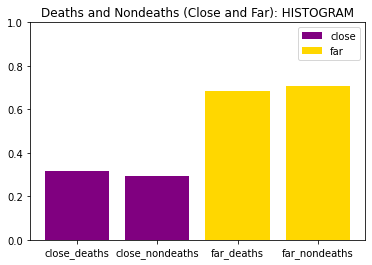

In [17]:
# Histogram

# Let's calculate the percentages of deaths that are 'close' versus 'far'. 
#    Close Deaths + Far Deaths should sum to 1! 
# (then we can do the same for non-graphs)
sewer_close_deaths_pct = sewer_close_deaths / (sewer_close_deaths+sewer_far_deaths)
sewer_far_deaths_pct = 1 - sewer_close_deaths_pct

sewer_close_nondeaths_pct = sewer_close_nondeaths / (sewer_close_nondeaths+sewer_far_nondeaths)
sewer_far_nondeaths_pct = 1 - sewer_close_nondeaths_pct


# 1. Let's first view the CLOSE deaths vs nondeaths. 
plt.bar(x=['close_deaths', 'close_nondeaths'], 
        height=[sewer_close_deaths_pct, sewer_close_nondeaths_pct], color='purple', label='close')

# 2. Let's first view the FAR deaths vs nondeaths.
plt.bar(x=['far_deaths', 'far_nondeaths'], 
        height=[sewer_far_deaths_pct, sewer_far_nondeaths_pct], color='gold', label='far')
plt.ylim((0,1))
plt.title("Deaths and Nondeaths (Close and Far): HISTOGRAM")
plt.legend()

As an alternative to histograms, line graphs can be used to display the same data. See below....

Text(0.5, 1.0, 'Deaths and Nondeaths (Close versus Far): LINE GRAPH')

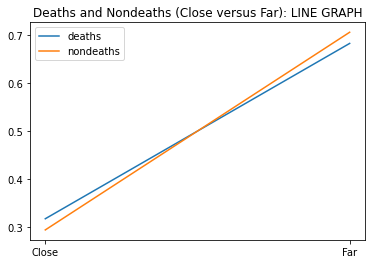

In [18]:
# Line graphs

plt.plot(['Close', 'Far'], [sewer_close_deaths_pct, sewer_far_deaths_pct], label='deaths')
plt.plot(['Close', 'Far'], [sewer_close_nondeaths_pct, sewer_far_nondeaths_pct], label='nondeaths')
plt.legend()
plt.title("Deaths and Nondeaths (Close versus Far): LINE GRAPH")

<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4g:** Interpreting the Visualizations</font>

**Do the histogram and line graph reach the same conclusion as your $Chi^2$ analysis? Why or why not?** 

> Write your answer here! 

<br>

<br>

--------------

### The 3 second rule
The 3 Second Rule (https://stephanieevergreen.com/the-3-second-rule/) states that one gets 3 seconds to grab someone’s attention and flag the take-home point of a data visualization. 

--------------

<br>

<br>


<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4h:** The BETTER visualization</font>

**Which visualization (histogram or line graph) better follows the 3-second rule?** 

> Write your answer here! 

## 4.4: Investigating the Broad Street Pump

Next, we want to explore the theory that cholera was transmitted through contaminated water. At the time, John Snow guessed that the water of a particular pump, the Broad Street Pump, might have carried pieces of poisonous sewage. Was this true? 

<table><tr>
    <td> <img src="imgs/pump3.jpeg" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

Now that you have experience performing not one, but TWO $Chi^2$ analyses, this one will be largely independent! In the following cells, you will need to: 
- filter your data
- create a contingency table
- generate (and comment on) the statistical significance
- provide one visualization (two, if time!) to convince your audience that your conclusion is plausible! 



In [19]:
# Filter data here. 


In [20]:
# Create contingency table here. 


In [21]:
# Find p-value here. 


<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4i:** Interpreting p-value: Sewers</font>

**Based on your p-value, is the relation you observe between deaths and closeness to sewers significantly different from what you would expect if the number of people in each group was equal? (at a 95% confidence interval?)** 

> Write your answer here! 

In [22]:
# Create histogram here. 


In [23]:
# Create line graph here. 


<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 4j:** Interpreting the Visualizations</font>

**Do the histogram and line graph reach the same conclusion as your $Chi^2$ analysis? Why or why not?** 

> Write your answer here! 

<br>

<br>

--------------

## 4.5: Reflection
<img src="imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size="4">**Journal 4k:** Reflection </font>

**What do you understand better after this notebook than before?**
> Write your answer here! 

**Please fill out the Notebook survey here!**
> https://forms.gle/54KHEbPGsRxQU3Bh9

<br>

--------------------------------

<br>

<img src="imgs/save-icon.jpeg" alt="Drawing" align=left style="width: 20px;"/> <font size="4">     **&ensp;&ensp;&ensp;Last step: save your work!** </font>